In [351]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sp
import pickle
import pandas as pd

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [352]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x_mesh, y_mesh = np.meshgrid(x, y, sparse=True)
#print(np.array(mesh).shape())
print(np.array(x_mesh)[:5,:5])

[[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]]


In [353]:
def f(x):
    return ( 4 - (2.1*(x[0]**2)) + ((x[0]**4)/3))*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2


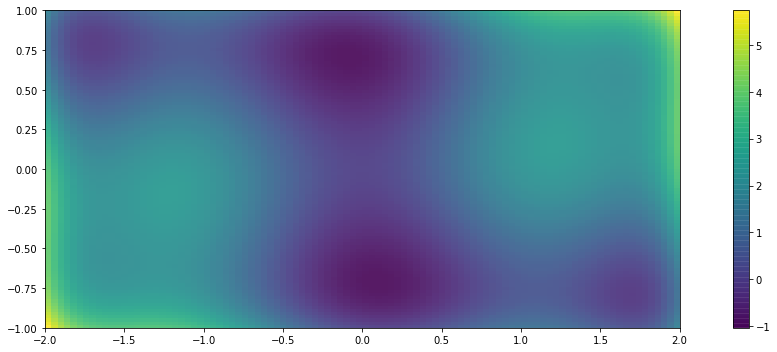

In [354]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 5))
im = ax.imshow(f([x_mesh, y_mesh]), extent=[-2, 2, -1, 1], alpha=0.9, cmap=plt.cm.viridis, origin='lower')
fig.colorbar(im, ax=ax)
fig.tight_layout()


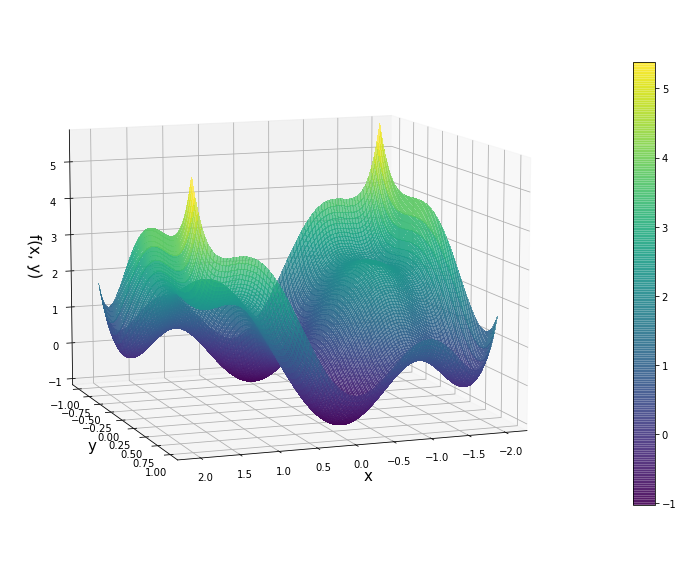

In [355]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
d3_plot = ax.plot_surface(x_mesh, y_mesh, f([x_mesh, y_mesh]), rstride=1, cstride=1,
                       cmap=plt.cm.viridis, linewidth=0, antialiased=False, alpha=0.7)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x, y)', fontsize=15)
ax.view_init(10, 70)
fig.colorbar(d3_plot, shrink=0.8)
fig.tight_layout()

In [446]:
points_powell = [[0,-0.75], [0,0.75], [0,0]]
points_cg = [[-1.6,0.5], [1.75,-0.80], [0,0]]

In [460]:
for i in points_powell:
    solution=sp.optimize.minimize(f,x0=i ,method='Powell')
    print(f'\n Solution with initial point {i}, and method Powell:\n')
    print(f' Did it coverge?:', solution['success'] )
    print('\n Point found: ', solution['x'])

    


 Solution with initial point [0, -0.75], and method Powell:

 Did it coverge?: True

 Point found:  [ 0.08987277 -0.71265816]

 Solution with initial point [0, 0.75], and method Powell:

 Did it coverge?: True

 Point found:  [-0.08986384  0.71265729]

 Solution with initial point [0, 0], and method Powell:

 Did it coverge?: True

 Point found:  [-0.08984201  0.71265634]


In [461]:
for i in points_cg:
    solution=sp.optimize.minimize(f,x0=i ,method='CG')
    print(f'\n Solution with initial point {i}, and method Newton CG:\n')
    print(f' Did it coverge?:', solution['success'] )
    print('\n Point found: ', solution['x'])


 Solution with initial point [-1.6, 0.5], and method Newton CG:

 Did it coverge?: True

 Point found:  [-1.70360669  0.79608353]

 Solution with initial point [1.75, -0.8], and method Newton CG:

 Did it coverge?: True

 Point found:  [ 1.70360656 -0.79608357]

 Solution with initial point [0, 0], and method Newton CG:

 Did it coverge?: True

 Point found:  [0. 0.]


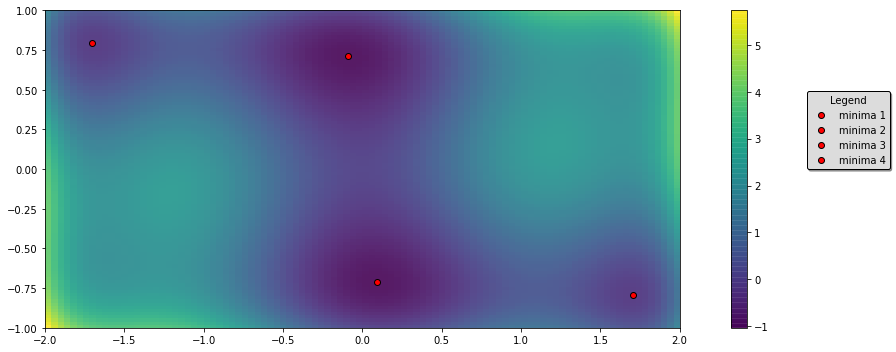

In [466]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 5))
im = ax.imshow(f([x_mesh, y_mesh]), extent=[-2, 2, -1, 1], alpha=0.9, cmap=plt.cm.viridis, origin='lower')
fig.colorbar(im, ax=ax)
for i in range(len(points_powell[:-1])):
    solution=sp.optimize.minimize(f,x0=points_powell[i] ,method='Powell')
    ax.scatter(solution['x'][0],solution['x'][1], color='red', edgecolor='black', label=f'minima {i+1}')
for i in range(len(points_cg[:-1])):
    solution=sp.optimize.minimize(f,x0=points_cg[i] ,method='CG')
    ax.scatter(solution['x'][0],solution['x'][1], color='red', edgecolor='black', label=f'minima {3+i}')
#ax.scatter(solution5['x'][0],solution5['x'][1], color='red', label='absolute minima 1')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', loc=[1.2, 0.5])
fig.tight_layout()

In [427]:
type(solution1['x'][0])

numpy.float64

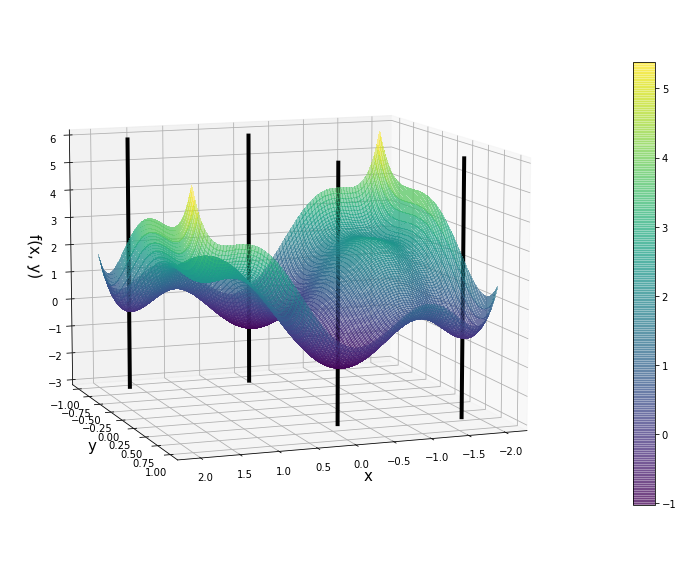

In [474]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
d3_plot = ax.plot_surface(x_mesh, y_mesh, f([x_mesh, y_mesh]), rstride=1, cstride=1,
                       cmap=plt.cm.viridis, linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x, y)', fontsize=15)
ax.view_init(10, 70)
for i in range(len(points_powell[:-1])):
    solution=sp.optimize.minimize(f,x0=points_powell[i] ,method='Powell')
    x_s = [solution['x'][0],solution['x'][0]]
    y_s = [solution['x'][1], solution['x'][1]]
    z_s = [-3,6]
    ax.plot(x_s, y_s, z_s, linewidth=4, color='black')
for i in range(len(points_cg[:-1])):
    solution=sp.optimize.minimize(f,x0=points_cg[i] ,method='CG')
    x_s = [solution['x'][0],solution['x'][0]]
    y_s = [solution['x'][1], solution['x'][1]]
    z_s = [-3,6]
    ax.plot(x_s, y_s, z_s, linewidth=4, color='black')
fig.colorbar(d3_plot, shrink=0.8)
fig.tight_layout()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [360]:
max_temp=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
#calendar.month_name[1:]

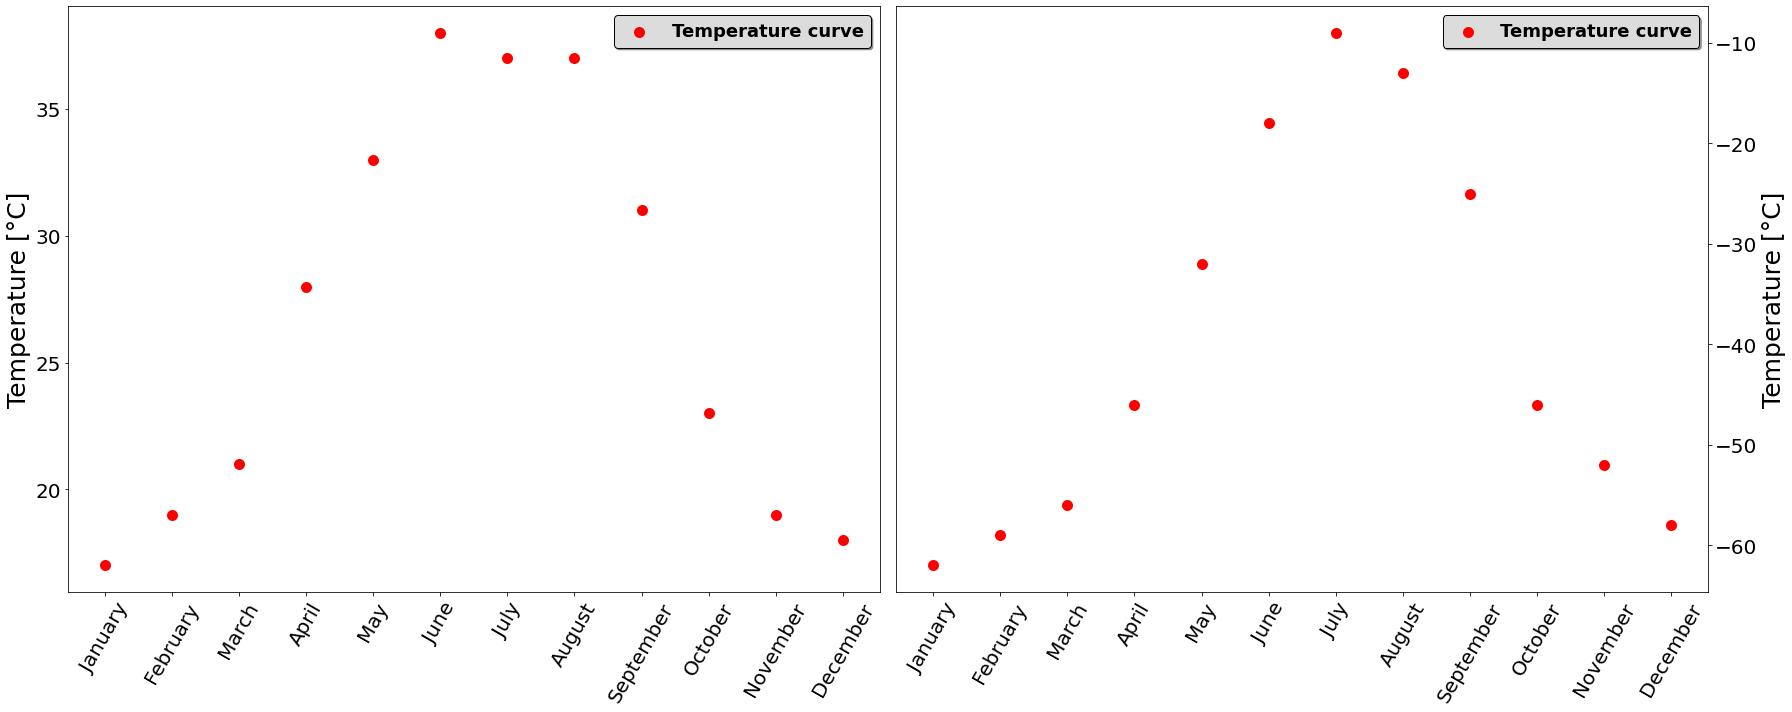

In [361]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Temperature curve', linewidth=5, color='red')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})


ax[1].scatter(calendar.month_name[1:], min_temp, label='Temperature curve', linewidth=5, color='red')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()

In [362]:
x_data=(np.arange(0,12))
x_axis=np.linspace(0, 11, 100)

In [363]:
def f_max(t, amplitude, omega, phi, offset):
    return amplitude * np.sin(omega * (t - phi)) + offset
popt_max, pcov_max = sp.optimize.curve_fit(f_max, x_data, max_temp, p0=[6, np.pi/12, 0, 17])

In [364]:
def f_min(t, amplitude, omega, phi, offset):
    return amplitude * np.sin(omega * (t - phi)) + offset
popt_min, pcov_min = sp.optimize.curve_fit(f_min, x_data, min_temp, p0=[6, np.pi/12, 1, -60])

In [365]:
def f_gauss_max(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset
popt_gauss_max, pcov_gauss_max = sp.optimize.curve_fit(f_gauss_max, x_data, max_temp, p0=[37, 7, 18, 3])
#print(popt)
#print(pcov)

In [366]:
def f_gauss_min(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset
popt_gauss_min, pcov_gauss_min = sp.optimize.curve_fit(f_gauss_min, x_data, min_temp, p0=[50, 7, -60, 3])
#print(popt)
#print(pcov)
print(popt_gauss_min)

[ 52.64929191   6.16452585 -61.32093582   1.97590009]


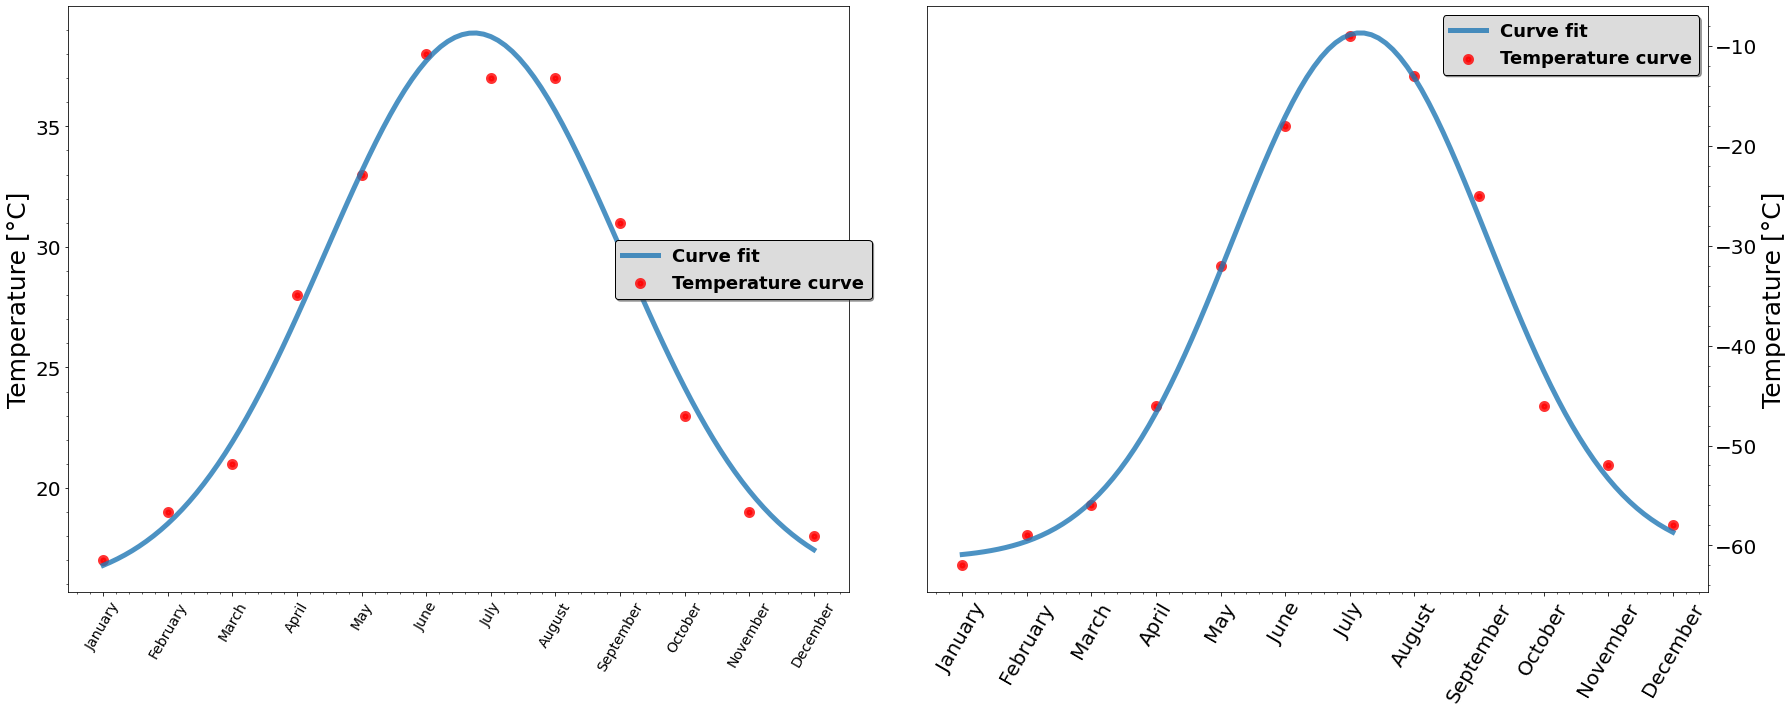

In [367]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[0].plot(x_axis, f_gauss_max((x_axis), *popt_gauss_max), linewidth=5, alpha=0.8, label='Curve fit')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=14, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18},loc=[0.7,0.5])
ax[0].minorticks_on()


ax[1].scatter(calendar.month_name[1:], min_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[1].plot(x_axis,f_gauss_min(x_axis, *popt_gauss_min), label='Curve fit', linewidth=5, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].minorticks_on()
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()




In [368]:
# Gauss max r
residuals = max_temp- f_gauss_max(x_data, *popt_gauss_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.99291470320281


In [369]:
# Gauss min r
residuals = min_temp- f_gauss_min(x_data, *popt_gauss_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9972984476272483


In [370]:
# Sine max r
residuals = max_temp- f_max(x_data, *popt_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9941077622912879


In [371]:
# Sine min r
residuals = min_temp- f_min(x_data, *popt_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9893029235548497


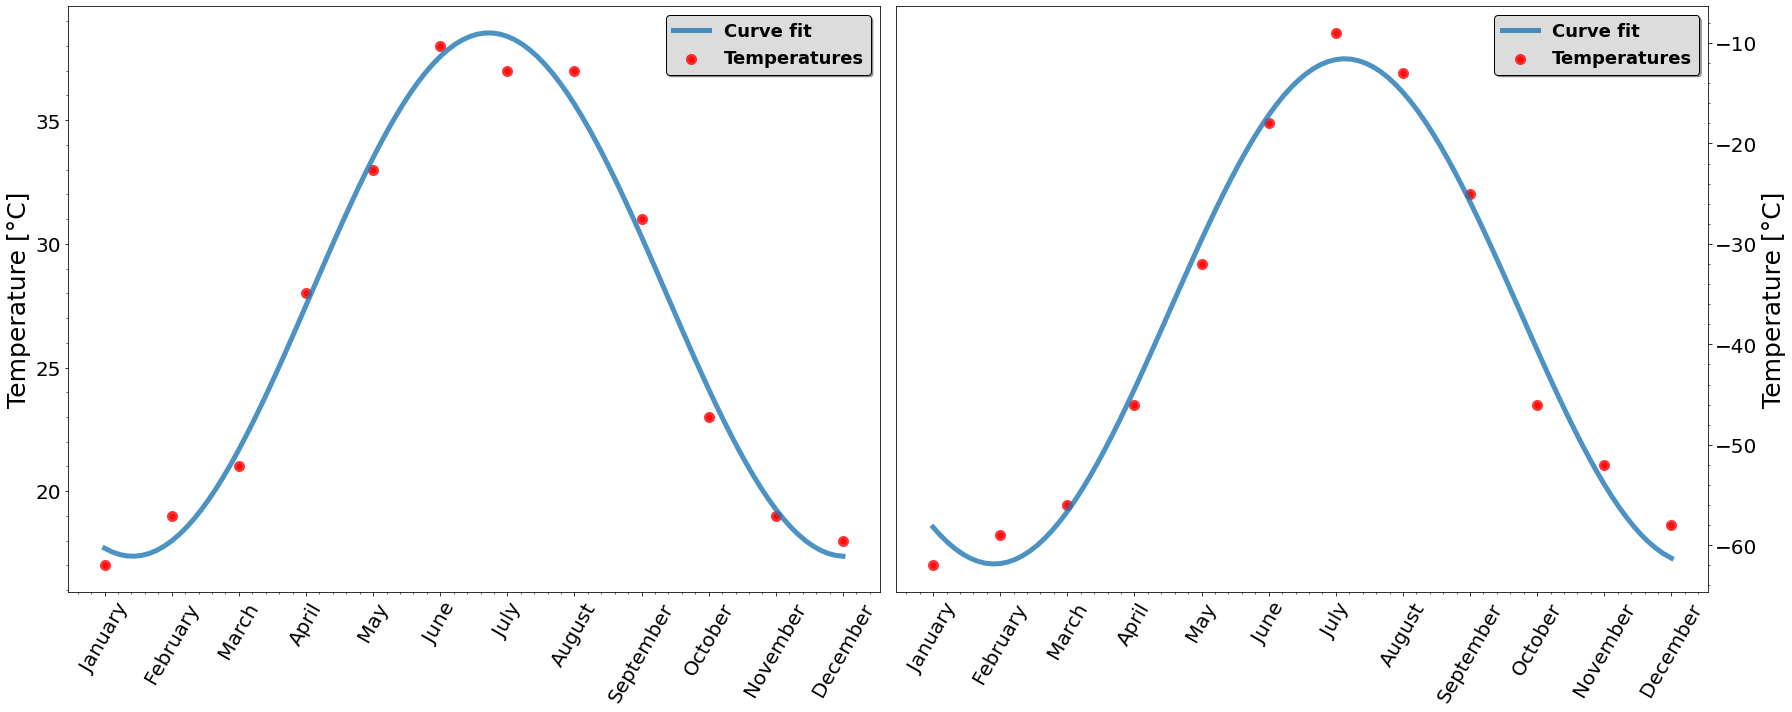

In [372]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Temperatures', linewidth=5, alpha=0.8, color='red')
ax[0].plot(x_axis, f_max(x_axis, *popt_max), linewidth=5, alpha=0.8, label='Curve fit')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].minorticks_on()
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
ax[1].scatter(calendar.month_name[1:], min_temp, label='Temperatures', linewidth=5, alpha=0.8, color='red')
ax[1].plot(x_axis,f_min(x_axis, *popt_min), label='Curve fit', linewidth=5, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].minorticks_on()
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()

In [373]:
#def f(x, mu, sigma):
#    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(((x-mu)/sigma)**2))
#popt, pcov = sp.optimize.curve_fit(f, x_data, max_temp, p0=[7, 2])
#print(popt)
#print(pcov)

In [374]:
#Compatibility gaussians 
comp_gaus = abs((popt_gauss_max[1]-popt_gauss_min[1]))/(np.sqrt(pcov_gauss_max[1, 1]+pcov_gauss_min[1, 1]))
print(comp_gaus)

4.638122132895186


In [375]:
print(pcov_gauss_max[1, 1])

0.006315145035850043


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [376]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/
    
    

In [377]:
# Importing the data
file = pd.read_pickle(r'lab_data/residuals_261.pkl')
df=pd.DataFrame.from_dict(file.item())
df.head()
print(df['residuals'].shape)

(11131,)


In [378]:
print(np.sqrt(11131))

105.5035544424926


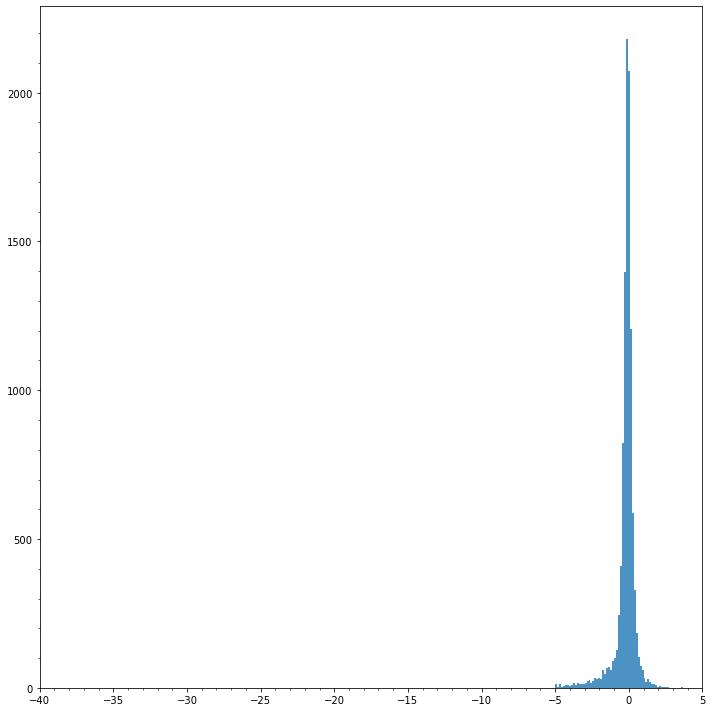

In [379]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 10))
ax.hist(df['residuals'], bins=75, alpha=0.8, range=(-5, 5))
ax.set_xlim([-40, 5])
ax.minorticks_on()

#entries1, edges1, _ = ax[0,1].hist(df['residuals'], bins=20, edgecolor='black', alpha=0.8)
#bin_centers1 = 0.5 * (edges1[:-1] + edges1[1:])
#poisson_err1 = np.sqrt(entries1)
#ax[0,1].set_ylim([0, 15])
#ax[0,1].set_xlim([-175, 30])


#entries2, edges2, _ = ax[1,0].hist(df['residuals'], bins=30, edgecolor='black', alpha=0.8)
#bin_centers2 = 0.5 * (edges2[:-1] + edges2[1:])
#poisson_err2 = np.sqrt(entries2)
#ax[1,0].set_ylim([4000, 6750])
#ax[1,0].set_xlim([-25, 30])
#ax[1,0].errorbar(bin_centers2, entries2, yerr=poisson_err2, fmt='r.' , label='Error bars')


#ax[1,1].hist(df['residuals'], bins=20, edgecolor='black', alpha=0.8)
#ax[1,1].set_ylim([0, 15])
#ax[1,1].set_xlim([-175, 30])
#ax[1,1].errorbar(bin_centers1, entries1, yerr=poisson_err1, fmt='r.' , label='Error bars')
fig.tight_layout()


In [380]:
def gaussian(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset

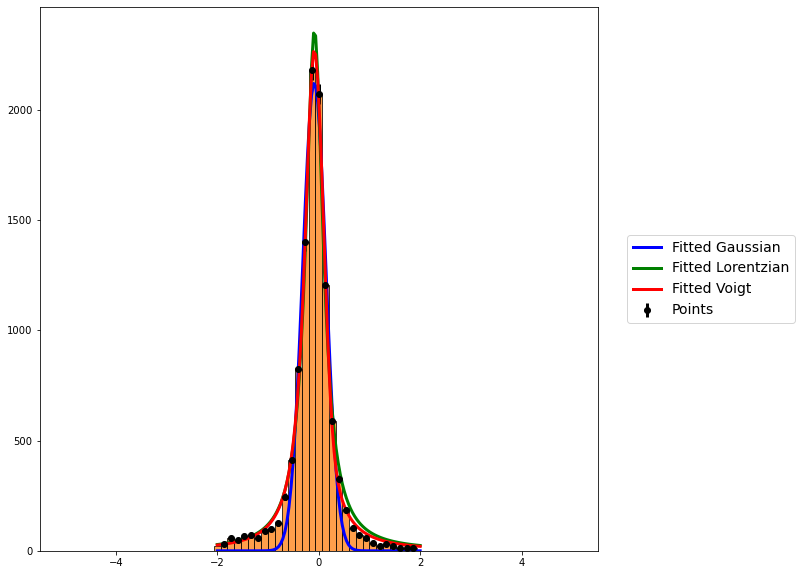

In [389]:
#We now reduce the residual dataset to prform the plot
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 10))
counts, bins , _ = ax.hist(df['residuals'], bins=75 , range=(-5,5) , alpha=0.75 , color='C1', edgecolor='black')
x_pos = np.array([(x1+x2)*0.5 for x1, x2 in zip(bins[:-1], bins[1:])])
err = np.array([np.sqrt(n) for n in counts])
counts= np.array(counts)
ind = np.array([ p for p in range (len(x_pos)) if ( -2 < x_pos[p] < 2)])

x_pos = x_pos[ind]
counts = counts[ind]
err = err[ind]
#choose a curve to fit

def gaussian(x, A , mean , std ):
    return A * np.exp( - ((x - mean) **2 /(2*std**2)))

def lorentzian(x, A, x0, gamma):
    return A*gamma**2/(gamma**2+(x-x0)**2)

def voigt(x, amplG, mu, std, amplL, x0, gamma):
    return gaussian(x, amplG, mu, std)+lorentzian(x, amplL, x0, gamma)



popt_gauss , pcov_gauss  = sp.optimize.curve_fit(gaussian, x_pos, counts, p0=[1600, 0, 1])

popt_lor, pcov_lor = sp.optimize.curve_fit(lorentzian, x_pos, counts , p0=[1600, 0, 1])

popt_voigt, pcov_voigt = sp.optimize.curve_fit(voigt, x_pos, counts, p0=[1000, 0, 1, 60, 0, 1])


x = np.linspace(-2, 2, 100)

ax.plot(x, gaussian(x, *popt_gauss), color='b', lw=3, label='Fitted Gaussian')
ax.plot(x, lorentzian(x, *popt_lor), color='g', lw=3, label='Fitted Lorentzian')
ax.plot(x, voigt(x, *popt_voigt), color='r', lw=3, label='Fitted Voigt')
ax.errorbar(x_pos, counts, err, fmt='o', c='black', ecolor='black', elinewidth=3, capsize=0 , label='Points')

ax.legend(loc='center left' , bbox_to_anchor=(1.04 , 0.5) , fontsize=14)



n Degrees of Freedom = 23
chi2 = 233.69560047510103
p-value = 0.0


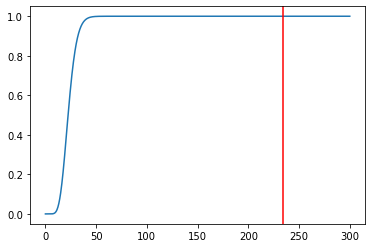

In [392]:
#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

ndof = len(x_pos) - 6
print("n Degrees of Freedom =", ndof)

# calculate the chi^2
chi2 = np.sum( ((counts - voigt(x_pos , *popt_voigt))**2) / err**2 )
print("chi2 =", chi2)


# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - sp.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory


x = np.linspace(0,300,1000)

plt.plot(x, sp.stats.chi2.cdf(x, df=ndof))
plt.fill_between(x_pos, counts, where=(x_pos > chi2), color='lightblue')
plt.axvline(chi2, color='r')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [393]:
! wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/

--2021-12-17 22:08:39--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [segue]
--2021-12-17 22:08:40--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc5bcdee3d1945e56e71a069babf.dl.dropboxusercontent.com/cd/0/inline/BcBNT5a3nvEHQg7IAbv0N9JkNa3rZGwg-tb4zocF9WFFLLvIqeJ6Sozmv7dsc2d0LfxySmhLwa4sfCNcj7IPe7z0G20DadaSTEL4Ade2PKCBw6QRrDMMQmXjT0_PmZUCHiLY1_U_XwkxsjnJOmkN3jNE/file# [segue]
--2021-12-17 22:08:40--  https://uc5bcdee3d1945e56e71a069babf.dl.dropboxusercontent.com/cd/